In [1]:
# imports des libraries nécessaires à la lecture et visualisation des données
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# imports des librairies de pré-traitement
from sklearn.preprocessing import LabelEncoder

# imports des différents modèles
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

#imports des métriques
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix, accuracy_score


## 1. Lecture et affichage

In [2]:
#Lecture du Dataset
df=pd.read_csv("train_users_2.csv")

In [3]:
#affichage
df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


## 2. Exploration des données: EDA

In [4]:
def exploration(df):
    qnt=0
    quant=[]
    qlt=0
    qualt=[]
    print("==============================================")
    print("Le dataset contient {} lignes et {} variables".format(df.shape[0], df.shape[1]))
    for col in df.columns:
        if df[col].dtype == 'object':
            qlt += 1
            qualt.append(col)
            #print("{}".format (col))
        else:
            qnt += 1
            quant.append(col)
            #print("{}".format (col))
    print("\n")
    print("Sur les 16 variables, {} sont quantitatives {} et {} sont qualitatives {}".format(qnt,quant, qlt, qualt))
    print("==============================================")
exploration(df)

Le dataset contient 213451 lignes et 16 variables


Sur les 16 variables, 3 sont quantitatives ['timestamp_first_active', 'age', 'signup_flow'] et 13 sont qualitatives ['id', 'date_account_created', 'date_first_booking', 'gender', 'signup_method', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser', 'country_destination']


### 2.1. Statistiques de base:

In [5]:
# variabls quantitatives
df.describe()

,timestamp_first_active,age,signup_flow
count,2.134510e+05,125461.000000,213451.000000
mean,2.013085e+13,49.668335,3.267387
std,9.253717e+09,155.666612,7.637707
min,2.009032e+13,1.000000,0.000000
25%,2.012123e+13,28.000000,0.000000
50%,2.013091e+13,34.000000,0.000000
75%,2.014031e+13,43.000000,0.000000
max,2.014063e+13,2014.000000,25.000000


In [6]:
# Variables qualitatives
df.describe(include='object').T

,count,unique,top,freq
id,213451,213451,6gp7n9e16w,1
date_account_created,213451,1634,2014-05-13,674
date_first_booking,88908,1976,2014-05-22,248
gender,213451,4,-unknown-,95688
signup_method,213451,3,basic,152897
language,213451,25,en,206314
affiliate_channel,213451,8,direct,137727
affiliate_provider,213451,18,direct,137426
first_affiliate_tracked,207386,7,untracked,109232
signup_app,213451,4,Web,182717


In [7]:
# Quelles sont les descripteurs (colonnes) du dataset?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

In [8]:
#Type des variables:
df.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

### 2.2. Doublons:

Il n'existe aucun enregistrement doublon dans le Dataset

In [9]:
df.duplicated().sum()

0

### 2.3. Valeurs manquantes:
Trois variables ont des valeurs manquantes:
- date_first_booking:  124543
- age: 87990
- first_affiliate_tracked: 6065

Cependant, comme on va le montrer plus bas, il existe d'autres marqueurs d'absence tels que '-unknown-' qui affecte certaines variables.

In [10]:
#Variables manquantes
df.isna().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

### 2.4. Visualisations de la distribution des modalités:
Dans ce qui suit, on va visualiser l'effectif de quelques modalités. A titre d'illustration,
on va prendre les variables "gender", "language", "country_destination", le but étant de montrer la distribution inégale de certaines modalités.

array([<AxesSubplot:ylabel='gender'>], dtype=object)

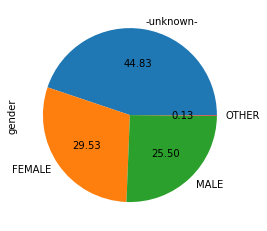

In [11]:
# Calcul des effectifs des variables qualitatives
gender= df.gender.value_counts()
gender.plot.pie(subplots=True, figsize = (4, 4), autopct='%.2f')

<AxesSubplot:xlabel='language', ylabel='count'>

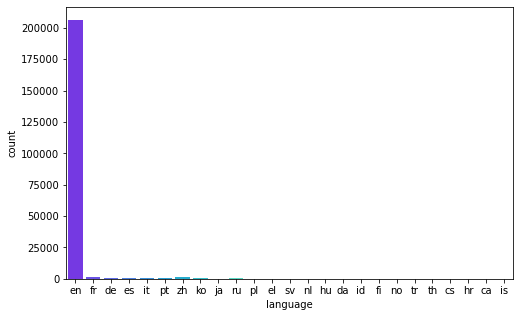

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(x='language', data=df, palette='rainbow')

array([<AxesSubplot:ylabel='country_destination'>], dtype=object)

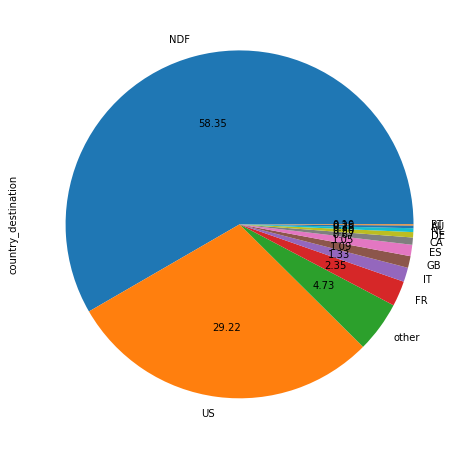

In [13]:
# Calcul des effectifs des variables qualitatives
country= df.country_destination.value_counts()
country.plot.pie(subplots=True, figsize = (14, 8), autopct='%.2f')

## 3.  Analyse approfondie des variables

#### Transformation des types:
-Age: est un float, sera transformé en int34

#### La variable 'id'

#### La variable age

In [14]:
# Valeurs manquantes:
age= df[df['age'].isna()]
pourc= round(len(age)/df.shape[0], 2)
print("La variable 'age' a {} valeurs manquantes, ou bien {}% des enregistrements".format(len(age), pourc))

La variable 'age' a 87990 valeurs manquantes, ou bien 0.41% des enregistrements


In [15]:
# Age: certaines valeurs sont des années (de naissance du client)
ages=df.age.value_counts(ascending=True)
ages.head(10)

1942.0    1
1935.0    1
1995.0    1
1925.0    1
1926.0    1
1952.0    1
2008.0    1
1938.0    1
1953.0    1
150.0     1
Name: age, dtype: int64

#### Les variables dates

#### Variable 'gender'

<AxesSubplot:xlabel='country_destination', ylabel='count'>

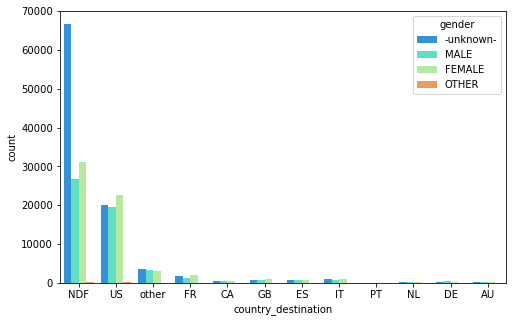

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(x='country_destination', data=df, palette='rainbow', hue='gender')

#### Corrélations entre les variables elles-mêmes et entre les variables et la cible

On a décelé une certaine corrélation entre certaines variables qualitatives. Pour tester la corrélation, on va recourir à la technique du crosstab et au test chi2

##### Test de corrélation entre les variables 'affiliate channel' et 'affiliate provider'

In [17]:
CrosstabResult=pd.crosstab(index=df['affiliate_channel'],columns=df['affiliate_provider'])

from scipy.stats import chi2_contingency
print(CrosstabResult)
#Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)

# P-Value is the Probability of H0 being True
# If P-Value > 0.05 then only we Accept the assumption(H0)

print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

affiliate_provider  baidu  bing  craigslist  daum  direct  email-marketing  \
affiliate_channel                                                            
api                     0     0           0     0       0                0   
content                 0     0           0     0       0                0   
direct                  0     0           0     0  137426                0   
other                   0     0        3471     0       0              166   
remarketing             0     0           0     0       0                0   
sem-brand               7   950           0     0       0                0   
sem-non-brand          18   889           0     1       0                0   
seo                     4   489           0     0       0                0   

affiliate_provider  facebook  facebook-open-graph  google  gsp  meetup  naver  \
affiliate_channel                                                               
api                        0                    0       0

##### Corrélation entre signup_app et signup_flow

In [18]:
CrosstabResult2=pd.crosstab(index=df['signup_app'],columns=df['signup_flow'])

from scipy.stats import chi2_contingency
print(CrosstabResult2)
#Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult2)

# P-Value is the Probability of H0 being True
# If P-Value > 0.05 then only we Accept the assumption(H0)

print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

signup_flow      0     1     2     3   4   5    6    8   10    12  15  16  20  \
signup_app                                                                      
Android           2     0     0     0   0   0    0    2   0  2599   0   0   0   
Moweb           556     0     0     0   0   0    0    1   0  1825   0   0   0   
Web          164001  1047  6881  8822   1  36  205  235   2   846  10  11  14   
iOS             180     0     0     0   0   0   96    2   0  4059   0   0   0   

signup_flow   21    23    24     25  
signup_app                           
Android        0  2818    33      0  
Moweb          0     0  3879      0  
Web          196    17   330     63  
iOS            0     0    86  14596  
The P-Value of the ChiSq Test is: 0.0


## 4. Transformations

#### Suppression de l'attribut 'id'

In [19]:
df.drop('id', axis=1, inplace=True)

#### Transformation de l'attribut 'age'

En plus des 87990 valeurs manquantes, la variable 'age' contient des valeurs aberrantes. Celles-ci sont de 2 types:

1- des valeurs aberrantes comme '150' ans

2- des années à la place de l'âge de la personne, comme '2008'.

D'autre part, la variable 'âge' a le type 'object' au lieu de 'int'

##### Stratégie:
1- Convertir le type de l'attribut de 'object' à int

2- Bucketing: regrouper les différentes valeurs dans des catégories 'bins'

In [20]:
# Convertir le type de 'age' et en même temps remplacer, momentanément, les valeurs manquantes par 0
df['age'] = df['age'].fillna(0).astype(int)

In [21]:
# Convertir la variable ages en catégories/bins:
df['ages']= pd.cut(df['age'],
                            bins= [-1,20,40,60,100,2014],
                           labels= [1,2,3,4,5])

#### Transformer puis supprimer les variables de type Date:
Dans ce qui suit, le but des transformations est d'extraire 2 prédicteurs: 'month_of_booking' et 'year_of_creation' du compte

In [22]:
# Convertir 'date_first_booking' en un object datetime
df["booking_date"] = pd.to_datetime(df.date_first_booking,format="%Y-%m-%d")

In [23]:
#Extraire le mois de réservation
df['month_of_booking'] = df['booking_date'].map(lambda dt:dt.month
if not pd.isnull(dt.month)
else None)

In [24]:
# Convertir 'date_account_created' en un object datetime
df["creation_date"] = pd.to_datetime(df.date_account_created,format="%Y-%m-%d")

In [25]:
# extraire l'année
df['year_of_creation'] = df['creation_date'].map(lambda dt:dt.year
if not pd.isnull(dt.year)
else None)

In [26]:
#Convertir le type de 'month_of_booking' et en même temps remplacer, momentanément, les valeurs manquantes par 0
df['month_of_booking'] = df['month_of_booking'].fillna(0).astype(int)

#### Suppression des attributs ayant servi aux transformations et suppression des attributs fortements corrélés


In [27]:
#Supprimer les attributs: date_account_created, timestamp_first_active et date_first_booking
df.drop(["date_account_created", "timestamp_first_active","date_first_booking","age","creation_date", "signup_flow", "affiliate_provider", "first_device_type", "booking_date"], axis=1, inplace=True)

In [28]:
#Shape du datatset après transformation
df.shape

(213451, 11)

#### Remplacement de valeurs manquantes:
La vaariable 'first_affiliate_tracked' comporte des valeurs manquantes qu'on va remplacer par des valeurs existantes à l'aide de la méthode fillna()

In [29]:
df["first_affiliate_tracked"].fillna(method="bfill", inplace=True)

### Encodage

In [30]:
#Affichage des attributs catégoriels
cat_cols = df.select_dtypes(include="object").columns.tolist()
print(cat_cols)

['gender', 'signup_method', 'language', 'affiliate_channel', 'first_affiliate_tracked', 'signup_app', 'first_browser', 'country_destination']


In [31]:
le_gender= LabelEncoder().fit(df["gender"])
genders=df["gender"]=le_gender.transform(df["gender"])
df["gender_encoded"]=genders

le_signup_method= LabelEncoder().fit(df["signup_method"])
signups= df["signup_method"]=le_signup_method.transform(df["signup_method"])
df["signup_encoded"]=signups


le_language= LabelEncoder().fit(df["language"])
languages= df["language"]=le_language.transform(df["language"])
df["language_encoded"] =languages


le_affiliate_channel= LabelEncoder().fit(df["affiliate_channel"])
channels= df["affiliate_channel"]=le_affiliate_channel.transform(df["affiliate_channel"])
df["affiliate_channel_encoded"]=channels

le_first_affiliate_tracked= LabelEncoder().fit(df["first_affiliate_tracked"])
affiliates= df["first_affiliate_tracked"]=le_first_affiliate_tracked.transform(df["first_affiliate_tracked"])
df["first_affiliate_tracked_encoded"]=affiliates

le_signup_app= LabelEncoder().fit(df["signup_app"])
apps= df["signup_app"]=le_signup_app.transform(df["signup_app"])
df["signup_app_encoded"]=apps

le_country_destination= LabelEncoder().fit(df["country_destination"])
destinations= df["country_destination"]=le_country_destination.transform(df["country_destination"])
df["country_destination_encoded"]=destinations

le_first_browser= LabelEncoder().fit(df["first_browser"])
browsers= df["first_browser"]=le_first_browser.transform(df["first_browser"])
df["first_browser_encoded"]=browsers

In [32]:
# supprimer les catégories transformées
df.drop(["gender","signup_method","language","affiliate_channel","first_affiliate_tracked","signup_app",
         "country_destination","first_browser"], axis=1, inplace=True)

#### Encodage manuel de la catégorie 'year_of_creation'

In [33]:
df["year_of_creation"]= df.year_of_creation.map(lambda x : 1 if x==2010 else 2 if x ==2011
                                                else 3 if x==2012 else 4 if x==2013 else 5)

In [34]:
# Affichage du datatset après les transformations et l'encodage catégoriel
df.head()

,ages,month_of_booking,year_of_creation,gender_encoded,signup_encoded,language_encoded,affiliate_channel_encoded,first_affiliate_tracked_encoded,signup_app_encoded,country_destination_encoded,first_browser_encoded
0,1,0,1,0,1,5,2,6,2,7,8
1,2,0,2,2,1,5,7,6,2,7,8
2,3,8,1,1,0,5,2,6,2,10,21
3,3,9,2,1,1,5,2,6,2,11,17
4,3,2,1,0,0,5,2,6,2,10,8


### Visualisation de la corrélation entre les variables:

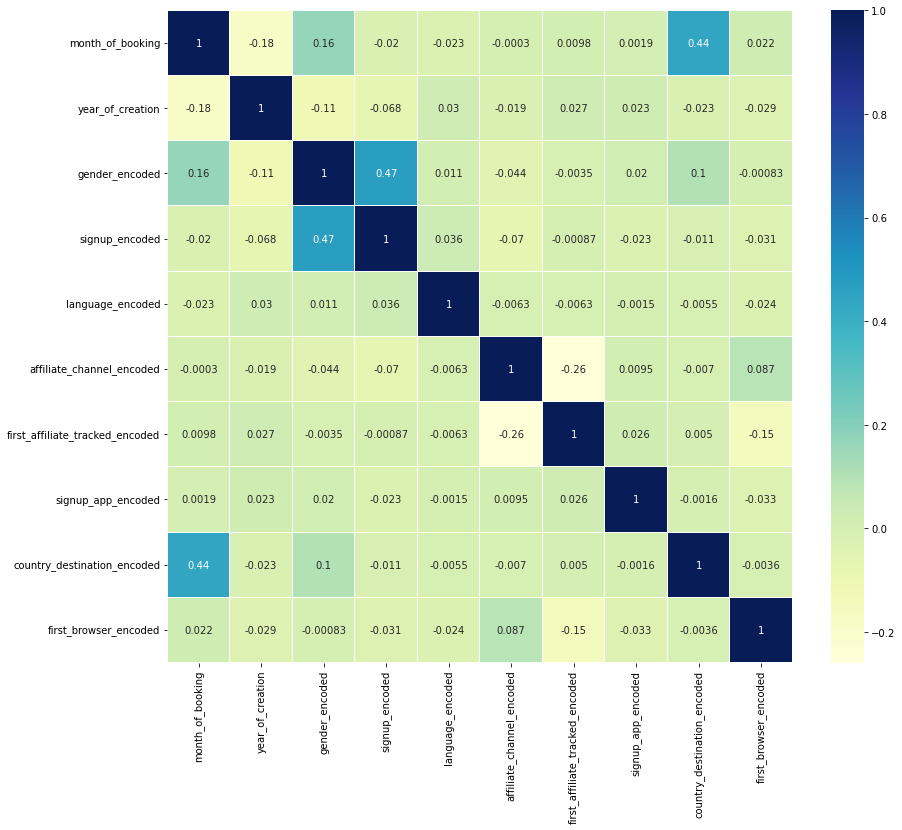

In [35]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

## Développement du modèle

#### Choix des prédicteurs

In [36]:
# choix des prédicteurs
X= df.drop(columns="country_destination_encoded")
X.shape

(213451, 10)

In [37]:
#définir la cible
y= df[['country_destination_encoded']]
print(y.shape)

(213451, 1)


In [38]:
# Affichage de l'encodage de la cible (elle servira au test sur un échantillon)
list(le_country_destination.inverse_transform([0,1,2,3,4,5,6,7,8,9,10,11]))

['AU', 'CA', 'DE', 'ES', 'FR', 'GB', 'IT', 'NDF', 'NL', 'PT', 'US', 'other']

#### Apprentissage du modèle

In [39]:
# Séparation des données en train et test
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
def createModel(predictors, target, model):
    model = model
    model.fit(predictors, np.ravel(target))
    return model

In [41]:
model= createModel(X_train, y_train,GaussianNB())

#### Métriques

In [42]:
models=[model]
for model in models:
    y_pred= model.predict(X_test)
    print("Métriques du modèle {}: ".format(model))
    # Model Accuracy, how often is the classifier correct?
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    #recall score (sensibilié)
    recall_score = metrics.recall_score(y_test, y_pred,average='weighted')
    print("Recall score du modèle est: {} ".format(recall_score))

    #recall score (sensibilié)
    precision_score = metrics.precision_score(y_test, y_pred, average='weighted')
    print("precision_score du modèle est: {} ".format(recall_score))
    #recall score (sensibilié)
    f1_score = metrics.f1_score(y_test, y_pred, average='weighted')
    print("F1 Score du modèle est: {} ".format(f1_score))
    print("\n")
    #print("Nombre de points mal-classifiés sur un total de %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
    print("Confusion matrix: ")
    print(confusion_matrix(y_test, y_pred))
    print("==============================================")

Métriques du modèle GaussianNB(): 
Accuracy: 0.8723852802698461
Recall score du modèle est: 0.8723852802698461 
precision_score du modèle est: 0.8723852802698461 
F1 Score du modèle est: 0.8242114155845065 


Confusion matrix: 
[[    0     0     0     0     0     0     0     0     0     0   114     0]
 [    0     0     0     0     0     0     0     0     0     0   273     2]
 [    0     0     0     0     0     0     0     0     0     0   207     1]
 [    0     0     0     0     0     0     0     0     0     0   447     4]
 [    0     0     0     0     0     0     0     0     0     0  1003     7]
 [    0     0     0     0     0     0     0     0     0     0   495     2]
 [    0     0     0     0     0     0     0     0     0     0   557     5]
 [    0     0     0     0     0     0     0 24843     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0   151     4]
 [    0     0     0     0     0     0     0     0     0     0    45     0]
 [    0     0     0   

C:\Users\JohnBigData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 6. Lecture et affichage du dataset de test

In [44]:
df_test= pd.read_csv("test_users.csv")

In [45]:
df_test.shape

(62096, 15)

In [46]:
df_test.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


#### Nettoyage et transformation du dataset

In [47]:
df_test.drop('id', axis=1, inplace=True)

In [48]:
df_test['age'] = df_test['age'].fillna(0).astype(int)

In [49]:
# Convertir 'date_first_booking' en un object datetime
df_test["booking_date"] = pd.to_datetime(df_test.date_first_booking,format="%Y-%m-%d")

In [50]:
#Extraire le mois de réservation
df_test['month_of_booking'] = df_test['booking_date'].map(lambda dt:dt.month
if not pd.isnull(dt.month)
else None)

In [51]:
df_test['month_of_booking'] = df_test['month_of_booking'].fillna(0).astype(int)

In [52]:
df_test["creation_date"] = pd.to_datetime(df_test.date_account_created,format="%Y-%m-%d")

In [53]:
# extraire l'année
df_test['year_of_creation'] = df_test['creation_date'].map(lambda dt:dt.year
if not pd.isnull(dt.year)
else None)

In [54]:
# Convertir la variable age en catégories:
df_test['ages']= pd.cut(df_test['age'],
                            bins= [-1,20,40,60,100,2014],
                           labels= [1,2,3,4,5])

In [55]:
df_test["first_affiliate_tracked"].fillna(method="bfill", inplace=True)

In [56]:
#Supprimer les attributs: date_account_created, timestamp_first_active et date_first_booking
df_test.drop(["date_account_created", "timestamp_first_active","date_first_booking","age","creation_date", "signup_flow", "affiliate_provider", "first_device_type", "booking_date"], axis=1, inplace=True)

In [57]:
# Forme du dataset
df_test.shape

(62096, 10)

#### Encodage

In [58]:
le_gender= LabelEncoder().fit(df_test["gender"])
genders=df_test["gender"]=le_gender.transform(df_test["gender"])
df_test["gender_encoded"]=genders

le_signup_method= LabelEncoder().fit(df_test["signup_method"])
signups= df_test["signup_method"]=le_signup_method.transform(df_test["signup_method"])
df_test["signup_encoded"]=signups


le_language= LabelEncoder().fit(df_test["language"])
languages= df_test["language"]=le_language.transform(df_test["language"])
df_test["language_encoded"] =languages


le_affiliate_channel= LabelEncoder().fit(df_test["affiliate_channel"])
channels= df_test["affiliate_channel"]=le_affiliate_channel.transform(df_test["affiliate_channel"])
df_test["affiliate_channel_encoded"]=channels

le_first_affiliate_tracked= LabelEncoder().fit(df_test["first_affiliate_tracked"])
affiliates= df_test["first_affiliate_tracked"]=le_first_affiliate_tracked.transform(df_test["first_affiliate_tracked"])
df_test["first_affiliate_tracked_encoded"]=affiliates

le_signup_app= LabelEncoder().fit(df_test["signup_app"])
apps= df_test["signup_app"]=le_signup_app.transform(df_test["signup_app"])
df_test["signup_app_encoded"]=apps

le_first_browser= LabelEncoder().fit(df_test["first_browser"])
browsers= df_test["first_browser"]=le_first_browser.transform(df_test["first_browser"])
df_test["first_browser_encoded"]=browsers

In [59]:
# suppression des attributs transformés
df_test.drop(["gender","signup_method","language","affiliate_channel","first_affiliate_tracked","signup_app",
         "first_browser"], axis=1, inplace=True)

In [60]:
# encodage manuel de la variable 'year_of_creation'
df_test["year_of_creation"]= df_test.year_of_creation.map(lambda x : 1 if x==2010 else 2 if x ==2011
                                                else 3 if x==2012 else 4 if x==2013 else 5)

In [61]:
#Forme du dataset test après nettoyage et encodage
df_test.head()

,month_of_booking,year_of_creation,ages,gender_encoded,signup_encoded,language_encoded,affiliate_channel_encoded,first_affiliate_tracked_encoded,signup_app_encoded,first_browser_encoded
0,0,5,2,1,1,6,1,6,1,17
1,0,5,1,0,0,6,1,6,1,17
2,0,5,1,0,0,6,1,0,2,5
3,0,5,1,0,0,6,1,0,2,11
4,0,5,1,0,0,6,1,6,2,23


In [ ]:
# Test sur une ligne dans le dataset test
ech= df_test[1:2]
Z= model.predict(ech)
print(Z.shape)
print(Z)

Le modèle prédit une réservation aux États-Unis. Pour rappel, voici l'encodage des valeurs de la
cible 'country_destination':
['AU', 'CA', 'DE', 'ES', 'FR', 'GB', 'IT', 'NDF', 'NL', 'PT', 'US', 'other']